In [632]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [633]:
train=pd.read_csv(r"C:\Users\Rahul\Desktop\Insurance_Churn_ParticipantsData\Train.csv")
test=pd.read_csv(r"C:\Users\Rahul\Desktop\Insurance_Churn_ParticipantsData\Test.csv")

In [634]:
label=train['labels']
train.drop(columns=['labels'],inplace=True)

In [635]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3


In [636]:
test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,-0.411453,-0.251940,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0.547323,0.182198,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,-0.411453,-0.251940,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,-0.411453,-0.251940,8,2,1,0,1,0,2,8,3


In [641]:
len(label)

33908

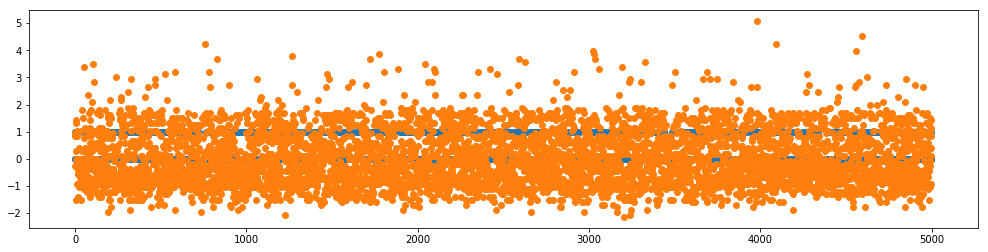

In [668]:
plt.figure(figsize=(17,4))
plt.scatter(range(5000),label[:5000])
plt.scatter(range(5000),train.feature_[:5000])

In [612]:
train['feature_11'].value_counts().count()

2

In [613]:
train['Mean']=np.mean(train.iloc[:,0:6],axis=1)
test['Mean']=np.mean(test.iloc[:,0:6],axis=1)
train['Median']=np.median(train.iloc[:,0:6],axis=1)
test['Median']=np.median(test.iloc[:,0:6],axis=1)
train['Std']=np.std(train.iloc[:,0:6],axis=1)
test['Std']=np.std(test.iloc[:,0:6],axis=1)

In [614]:
train['Mean1']=np.mean(train.iloc[:,7:],axis=1)
test['Mean1']=np.mean(test.iloc[:,7:],axis=1)
train['Median1']=np.median(train.iloc[:,7:],axis=1)
test['Median1']=np.median(test.iloc[:,7:],axis=1)
train['Std1']=np.std(train.iloc[:,7:],axis=1)
test['Std1']=np.std(test.iloc[:,7:],axis=1)

In [615]:
train['feature_10'].value_counts()         #4, 6,  

0    33293
1      615
Name: feature_10, dtype: int64

In [616]:
mm=MinMaxScaler()
tr=pd.DataFrame(mm.fit_transform(train[['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','Mean','Median','Std','Mean1','Median1','Std1']]))
te=pd.DataFrame(mm.fit_transform(test[['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','Mean','Median','Std','Mean1','Median1','Std1']]))

In [617]:
train=pd.concat([train,tr],axis=1)
test=pd.concat([test,te],axis=1)
train.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','Mean','Median','Std','Mean1','Median1','Std1'],inplace=True)
test.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','Mean','Median','Std','Mean1','Median1','Std1'],inplace=True)

In [586]:
tr.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.259740,0.073439,0.866667,0.051850,0.032258,0.174269,0.018182,0.194658,0.304350,0.049018,NaN,NaN,0.652976
1,0.415584,0.089345,0.633333,0.001220,0.000000,0.000000,0.000000,0.138673,0.245842,0.046188,NaN,NaN,0.255359
2,0.428571,0.080366,1.000000,0.015657,0.032258,0.000000,0.000000,0.189055,0.275214,0.064879,NaN,NaN,0.450081
3,0.415584,0.074628,0.766667,0.050427,0.000000,0.000000,0.000000,0.160904,0.216912,0.044942,NaN,NaN,0.368979
4,0.480519,0.129138,0.166667,0.047377,0.016129,0.000000,0.000000,0.174536,0.230726,0.073757,NaN,NaN,0.510744


In [618]:
train.head()

,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,0,...,3,4,5,6,7,8,9,10,11,12
0,3,0,1,0,0,0,0,10,2,0.259740,...,0.051850,0.032258,0.174269,0.018182,0.194658,0.304350,0.049018,0.411869,0.102731,0.651687
1,4,1,2,0,1,0,0,0,3,0.415584,...,0.001220,0.000000,0.000000,0.000000,0.138673,0.245842,0.046188,0.256009,0.219509,0.253043
2,6,1,2,0,0,0,0,5,3,0.428571,...,0.015657,0.032258,0.000000,0.000000,0.189055,0.275214,0.064879,0.442077,0.299950,0.447631
3,4,0,2,0,1,0,0,5,3,0.415584,...,0.050427,0.000000,0.000000,0.000000,0.160904,0.216912,0.044942,0.369396,0.214147,0.367761
4,0,1,1,0,0,0,0,8,3,0.480519,...,0.047377,0.016129,0.000000,0.000000,0.174536,0.230726,0.073757,0.327091,0.056466,0.510442


In [619]:
a=pd.get_dummies((train[['feature_7','feature_8','feature_9','feature_13','feature_14','feature_15']]).astype('category'))
b=pd.get_dummies((test[['feature_7','feature_8','feature_9','feature_13','feature_14','feature_15']]).astype('category'))

In [620]:
train=pd.concat([train,a],axis=1)
test=pd.concat([test,b],axis=1)

In [621]:
test.shape

(11303, 60)

In [622]:
train.drop(columns=['feature_7','feature_8','feature_9','feature_13','feature_14','feature_15'],inplace=True)
test.drop(columns=['feature_7','feature_8','feature_9','feature_13','feature_14','feature_15'],inplace=True)

In [625]:
def splitting(m, train= train, label = label, test = test, random_state = 90):
    a = list()
    b = list()
    sss=StratifiedShuffleSplit(random_state= random_state,test_size=0.2,n_splits=5)
    for tr_index, te_index in sss.split(train,label):
        xtrain, xtest = train.loc[tr_index,:], train.loc[te_index,:]
        ytrain, ytest = label[tr_index], label[te_index]   
        m.fit(xtrain,ytrain)
        p = m.predict(xtest)
        a.append(accuracy_score(ytest,p))
        b.append(f1_score(ytest,p))
 #   print(pd.Series(m.feature_importances_, index = train.columns).sort_values(ascending=True).plot.barh())
    print(np.mean(a),'    ',np.mean(b))
  #  return(pd.DataFrame(m.predict(test)))

In [626]:
l=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),ExtraTreesClassifier()]
n=0
while(n<=(len(l)-1)):
    splitting(l[n],train,label,test,random_state=2500)
    print(l[n])
    n=n+1

E:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8994102034797995      0.4277084191936352
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.8736066057210262      0.46652006352377917
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.897670303745208      0.4270378600700237
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.8983485697434386      0.46169539430662204
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
0.9046593925095842      0.49975822439217643
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_

E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8940725449719846      0.4111214118662467
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [627]:
plt.figure(figsize=(10,15))
splitting(GradientBoostingClassifier(),train,label,test,random_state=100)

0.9072544971984666      0.5121668524286247


<Figure size 720x1080 with 0 Axes>